# SVM

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Do not print warning messages


import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score

In [2]:
def plot_svm_decision(X_train, y_train, clf):

    plt.figure(figsize=(10,10))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:,0], cmap=plt.cm.RdBu)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [3]:
n = 1500          # number of data points
p = 2             # dimension
sigma = 1         # variance of the distribution
meanpos = 0       # centre of the distribution of positive examples
meanneg = 3       # centre of the distribution of negative examples
npos = round(n/2) # number of positive examples
nneg = n-npos     # number of negative examples

# Generate the positive and negative examples
Xpositive = np.random.normal(meanpos,sigma,(npos,p))
Xnegative = np.random.normal(meanneg,sigma,(npos,p))

x = np.vstack((Xpositive,Xnegative))

# Generate the labels
y = np.vstack((np.array([1]*npos).reshape(-1,1), np.array([0]*nneg).reshape(-1,1)))

Visualize

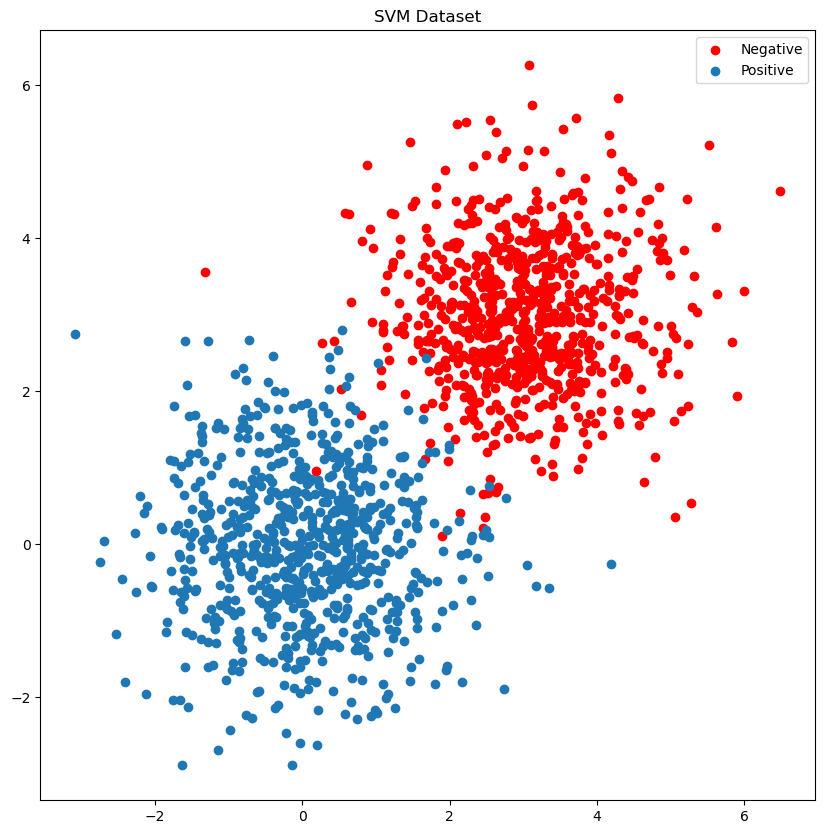

In [4]:
plt.figure(figsize=(10,10))
plt.title("SVM Dataset")
plt.scatter(Xnegative[:,0],Xnegative[:,1],color="red", label="Negative")
plt.scatter(Xpositive[:,0],Xpositive[:,1],label="Positive")
plt.legend()

We will make use of the `SVM` package (https://scikit-learn.org/stable/modules/svm.html) in the `sklearn` to train a SVM classifier on the generated data.

There are two important parameters:
 - `C` that controls the penalty of wrongly categorize datapoints depending on their distance from the separating hyperplane. Selecting a proper C vaule is crucial to the generalizability of the SVM. In this example code, it´s set to 1.

 - The other parameter is the kernel applied. For this example, we use a linear kernel.


In [5]:
from sklearn import svm

C = 1

svm_clf = svm.SVC(C=C,kernel='linear')

print("Cross-validated Accuracy = {:.4f}".format(np.mean(cross_val_score(svm_clf, x, y))))

Cross-validated Accuracy = 0.9833


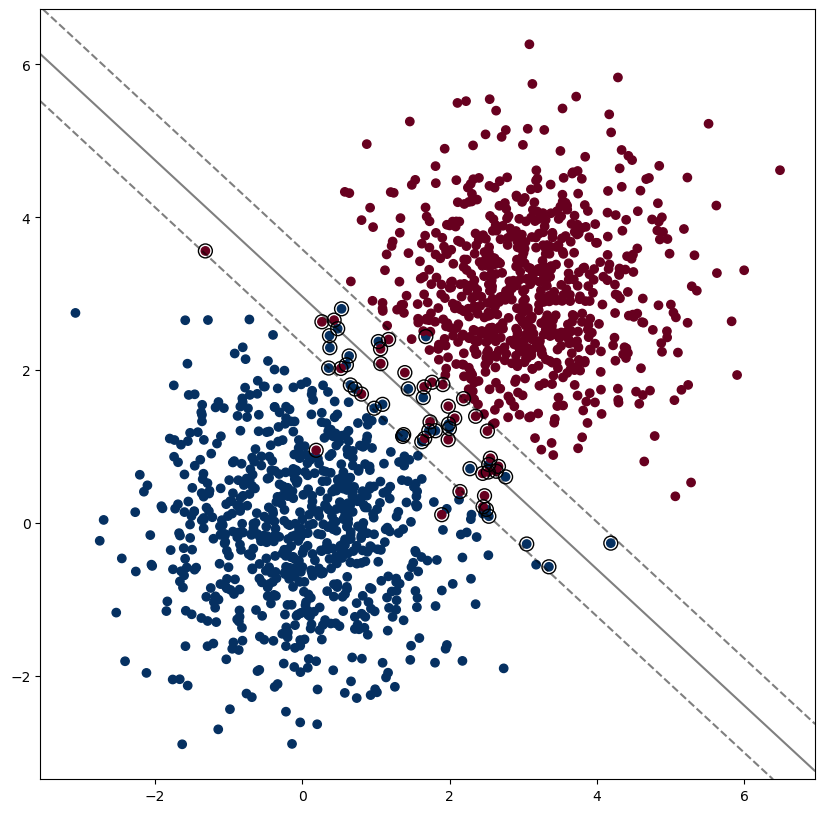

In [6]:
plot_svm_decision(x, y, svm_clf.fit(x,y))

An almost perfect classifier as we expected.

# Exercise #1: RBF Kernel

Based on the previous code, test a non-linear kernel and plot the decision boundary.

How does it affect to the classification boundary?

Cross-validated Accuracy = 0.9833


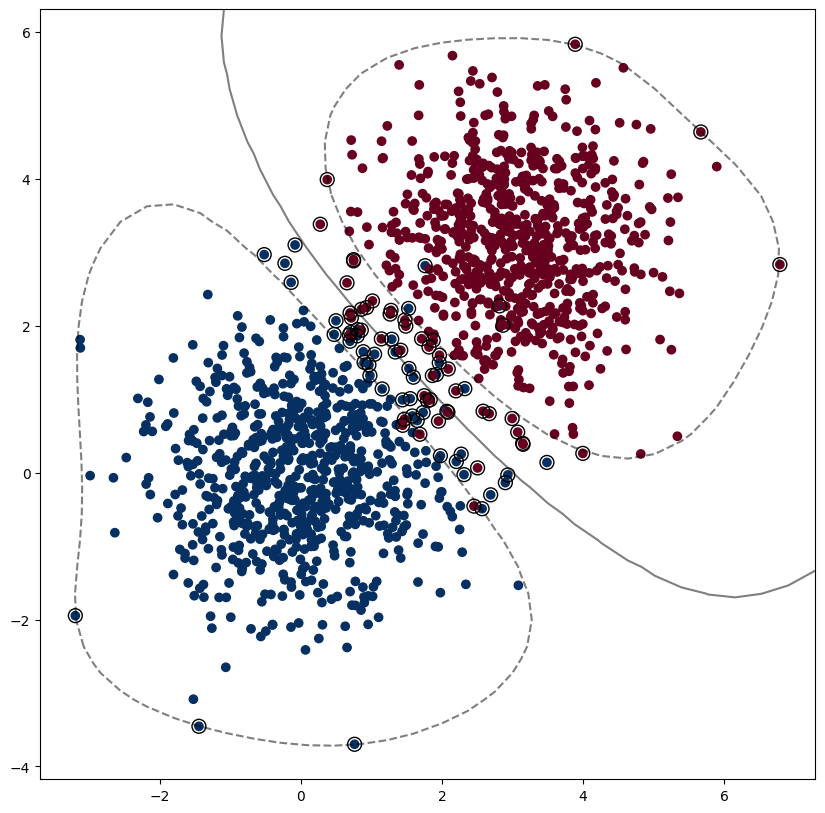

In [ ]:
C = 1

rbf_svm_clf = svm.SVC(C=C, kernel='rbf')
print("Cross-validated Accuracy = {:.4f}".format(np.mean(cross_val_score(rbf_svm_clf, x, y))))

plot_svm_decision(x, y, rbf_svm_clf.fit(x,y))


# Exercise #2: Regularization

Play with different values of `C` and explain how they affect to the decision boundary.

Cross-validated Accuracy = 0.9840


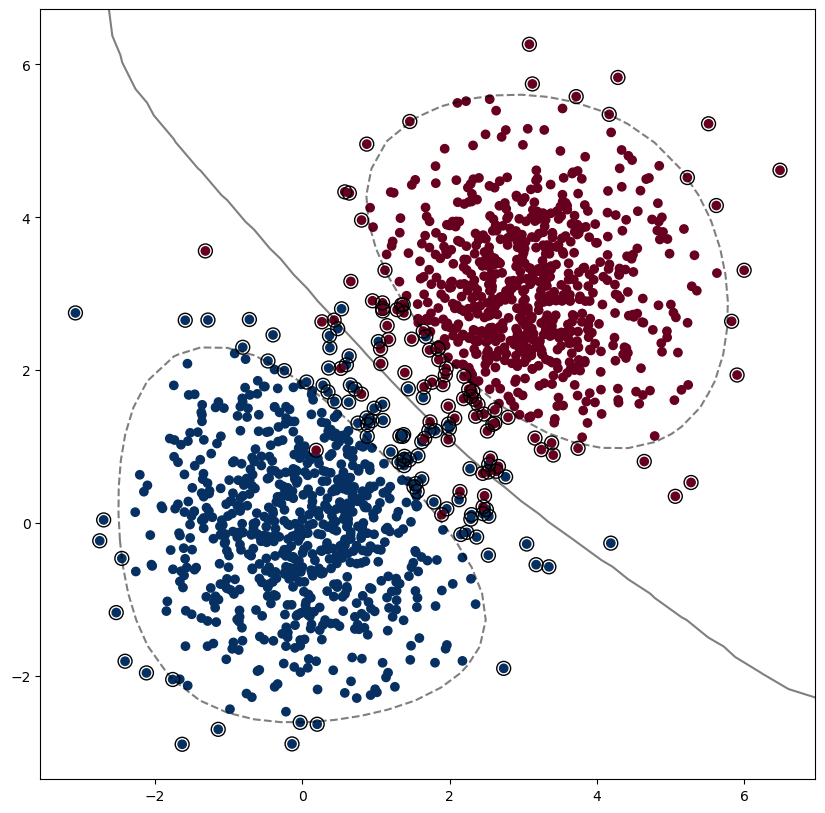

In [17]:
C = 0.1

rbf_svm_clf = svm.SVC(C=C, kernel='rbf')
print("Cross-validated Accuracy = {:.4f}".format(np.mean(cross_val_score(rbf_svm_clf, x, y))))

plot_svm_decision(x, y, rbf_svm_clf.fit(x,y))

# Exercise #3: Polynomial Kernel

We have played with linearly separable data. Let's see now how SVM behaves for non-linearly separable data. To that end we load the "spiral data", where each color belongs to one class.

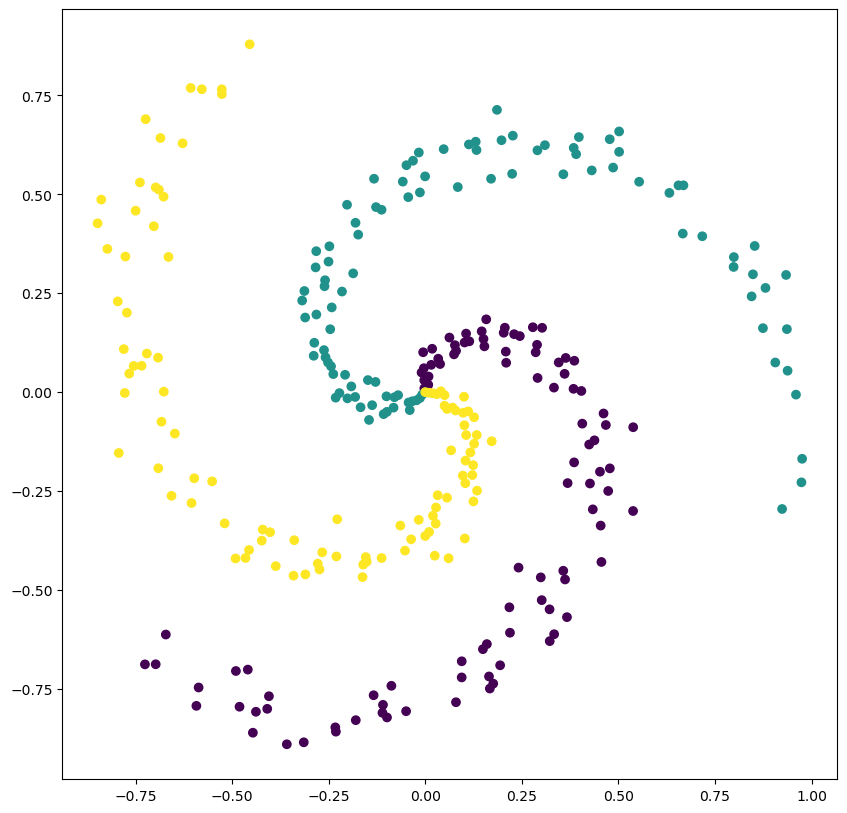

In [18]:
train = pd.read_csv("datasets/train_svm.csv")
test = pd.read_csv("datasets/test_svm.csv")

plt.figure(figsize=(10,10))
plt.scatter(train.X, train.Y, c=train.Label);

In [29]:
# to visualize the polynomial kernels we'll need a new visualization function

def svm_polynomial_kernel(degree=int):

    clf = svm.SVC(degree=degree, kernel='poly')
    clf.fit(train.iloc[:,1:3], train.Label)

    plt.figure(figsize=(2,2))

    # create a mesh to plot in
    x_min, x_max = train.iloc[:, 1].min(), train.iloc[:, 1].max()
    y_min, y_max = train.iloc[:, 2].min(), train.iloc[:, 2].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot also the training points
    plt.scatter(train.iloc[:, 1], train.iloc[:, 2], c=train.Label)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

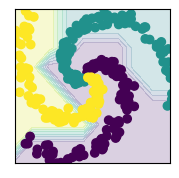

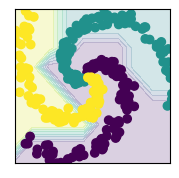

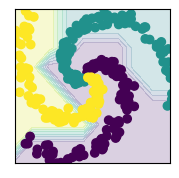

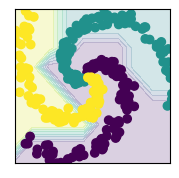

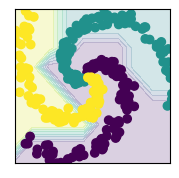

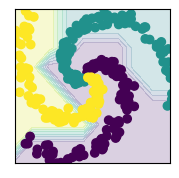

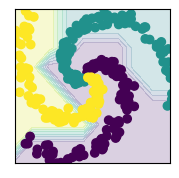

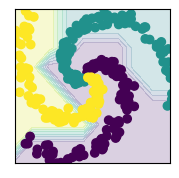

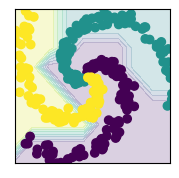

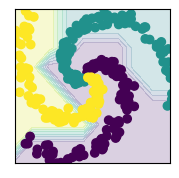

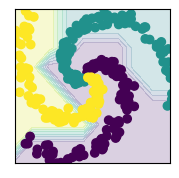

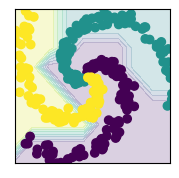

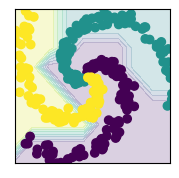

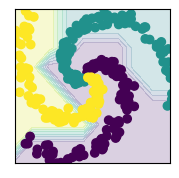

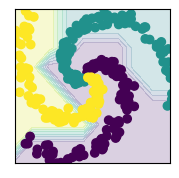

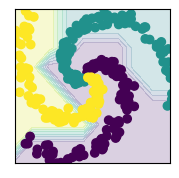

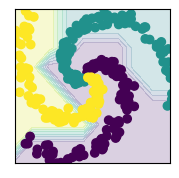

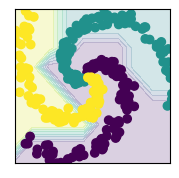

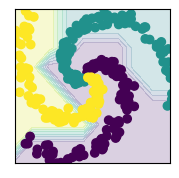

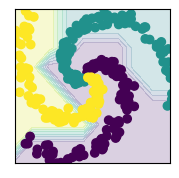

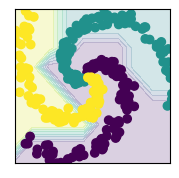

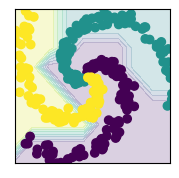

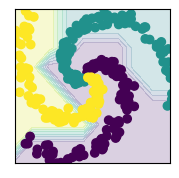

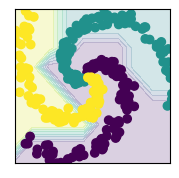

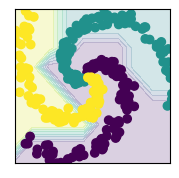

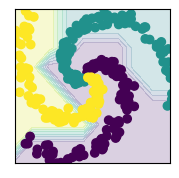

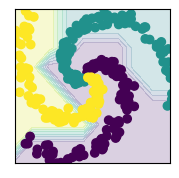

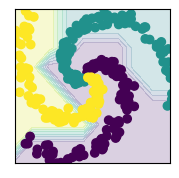

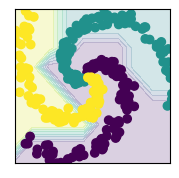

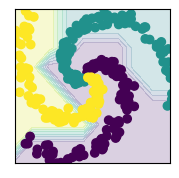

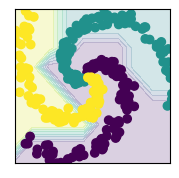

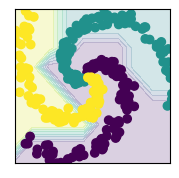

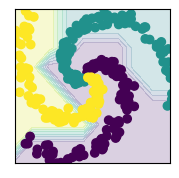

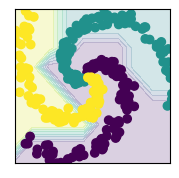

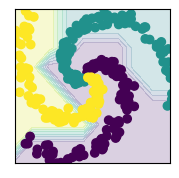

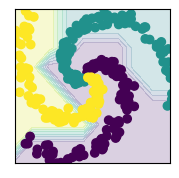

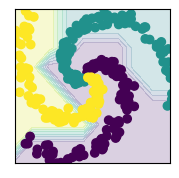

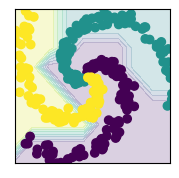

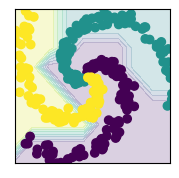

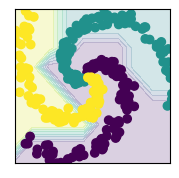

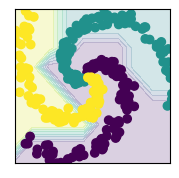

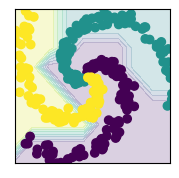

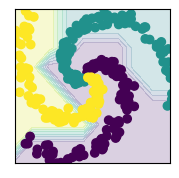

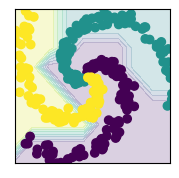

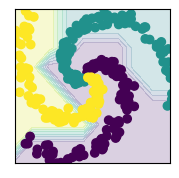

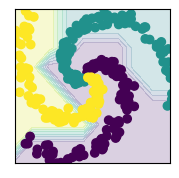

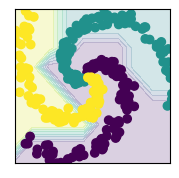

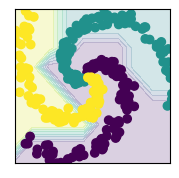

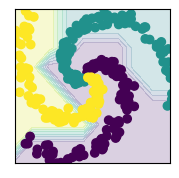

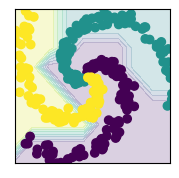

In [30]:
i=3
for i in range(50):
    svm_polynomial_kernel(degree=3)
    i = i +1

In [ ]:
grid